In [28]:
# ! pip install --quiet transformers
# ! pip install --quiet "transformers[torch]"
# ! pip install --quiet torch
# ! pip install --quiet datasets
# ! pip install --quiet evaluate
# ! pip install --quiet scikit-learn
# ! pip install --quiet tensorboard
# ! pip install --quiet matplotlib
# ! pip install --quiet ipywidgets
# ! pip install --quiet seaborn

In [1]:
import torch
import numpy as np

import evaluate
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoImageProcessor, AutoModelForImageClassification
from transformers import pipeline

from huggingface_hub import notebook_login

In [ ]:
notebook_login()

# **Dataset**

In [15]:
dataset = load_dataset("cvmil/rice-disease-02")

In [16]:
labels = dataset['train'].features['label'].names

print(dataset)
print("\n\nlabels:", len(labels), labels)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 13520
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1503
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2963
    })
})


labels: 10 ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_blast', 'leaf_scald', 'narrow_brown_spot', 'neck_blast', 'rice_hispa', 'sheath_blight', 'tungro']


# **Model**

In [22]:
from transformers import pipeline
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pipeline for image classification
classifier = pipeline("image-classification", model="cvmil/vit-base-patch16-22_241028", device=0)

# Load the dataset
dataset = load_dataset("cvmil/rice-disease-02", split="test")

all_preds = []
all_labels = []

# Evaluate the model on the dataset
for example in dataset:
    # Run inference
    image = example['image']
    result = classifier(image)

    # Get the predicted label (the one with the highest score)
    predicted_label = result[0]['label']
    all_preds.append(labels.index(predicted_label))
    all_labels.append(example['label'])



[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 5, 1, 5, 1, 3, 3, 3, 5, 5, 3, 8, 2, 1, 1, 8, 3, 1, 3, 3, 1, 3, 8, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Classification Report:
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.90      0.96      0.93        80
           brown_spot       0.90      0.88      0.89       344
              healthy       0.85      0.93      0.89       391
           leaf_blast       0.82      0.84      0.83       362
           leaf_scald       0.95      0.96      0.96       386
    narrow_brown_spot       0.94      0.91      0.93       382
           neck_blast       0.98      1.00      0.99       322
           rice_hispa       0.91      0.79      0.84       225
        sheath_blight       0.94      0.89      0.92       288
               tungro       0.95      0.97      0.96       183

             accuracy                           0.91      2963
            macro avg       0.91      0.91      0.91      2963
         weighted avg       0.91      0.91      0.91      2963



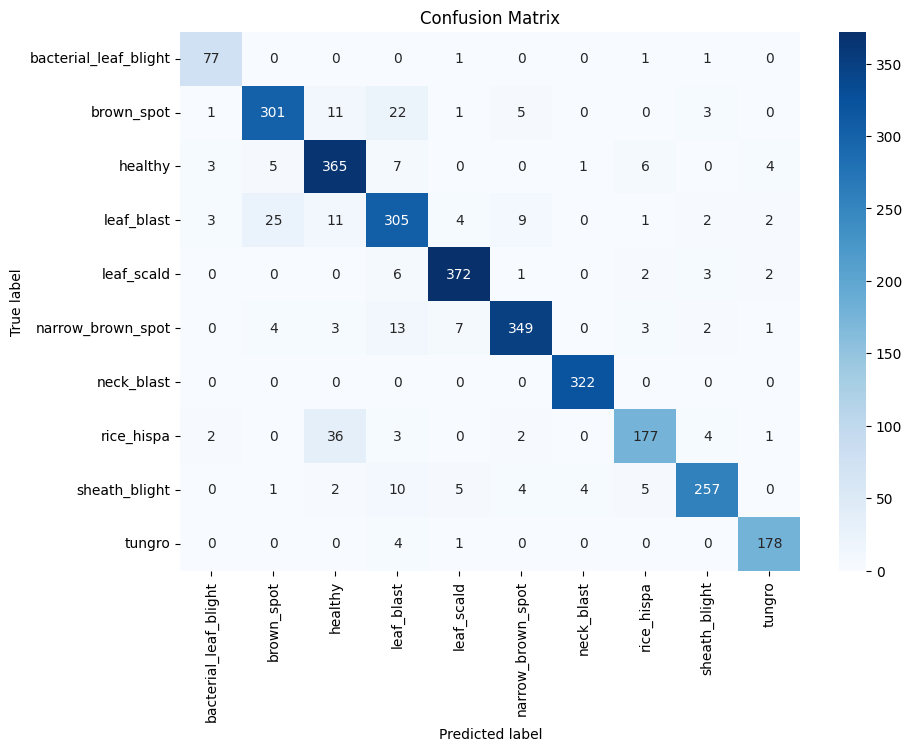

In [24]:

# Compute performance metrics
cm = confusion_matrix(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=labels)

print("Classification Report:")
print(report)

# Display confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()